# <b>Random Variables Generation</b>

### Twister Mersenne Algorithm algo_MT19937

In [7]:
# Code601_1.py

# algo MT19937
def algo_MT19937(seed=0):
    # coefficients for MT19937
    (w, n, m, r) = (32, 624, 397, 31)
    a = 0x9908B0DF
    (u, d) = (11, 0xFFFFFFFF)
    (s, b) = ( 7, 0x9D2C5680)
    (t, c) = (15, 0xEFC60000)
    (l, f) = (18, 1812433253)
    (lower_mask, upper_mask)= (0xFFFFFFFF, 0x00000000)

    # The state of the generator array of n elements
    MT = [0 for i in range(n)]
    index = n+1

    # initialize the generator from a seed
    def initialize_mt(seed):
        MT[0] = seed
        for i in range(1, n):
            MT[i]  = (f * (MT[i-1] ^ (MT[i-1] >> (w-2))) + i)  & 0xffffffff

    # Generate a random number
    def generate_number():
        # do a twist on every n numbers
        nonlocal index
        if index >= n:
            for i in range(0, n):
                x = (MT[i] & upper_mask) + (MT[(i + 1) % n] & lower_mask)
                xA = x >> 1 if (x % 2) == 0 else (x >> 1) ^ a
                MT[i] = MT[(i + m) % n] ^ xA
            index = 0

        # Extract a tempered value based on MT[index]
        y = MT[index]
        y = y ^ ((y >> u) & d)
        y = y ^ ((y << s) & b)
        y = y ^ ((y << t) & c)
        y = y ^ (y >> l)

        index += 1
        return y & 0xffffffff

    # Generator core
    initialize_mt(seed)
    while True:
        yield generate_number()

# generate 10 random numbers
if __name__ == '__main__':
    g_MT= algo_MT19937()
    for _ in range(10): print(next(g_MT))

# =====================================================================
2357136044
2546248239
3071714933
3626093760
3729171009
3684848379
3480577985
2632805477
679261451
3685339089

2357136044
2546248239
3071714933
3626093760
3729171009
3684848379
3480577985
2632805477
679261451
3685339089


3685339089

In [7]:
#Code501.py

from math import factorial

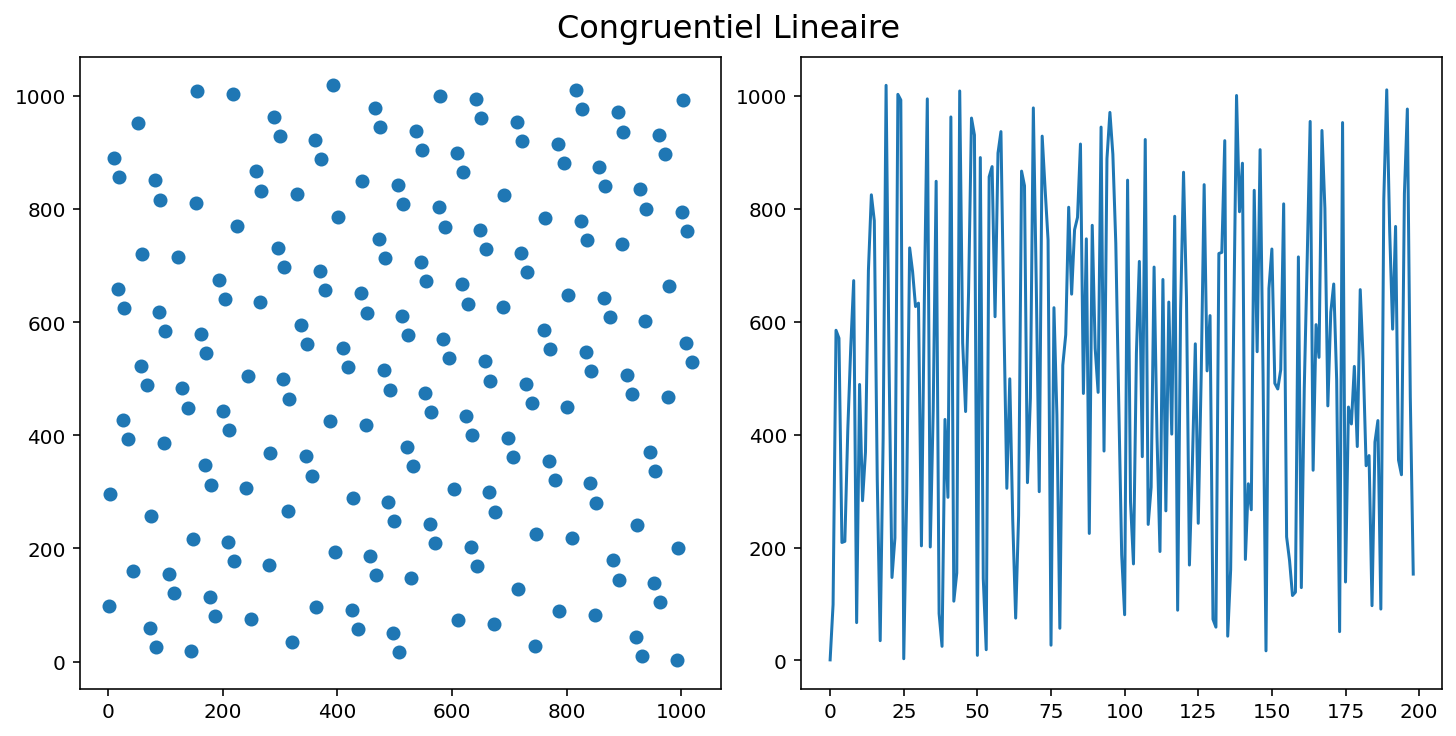

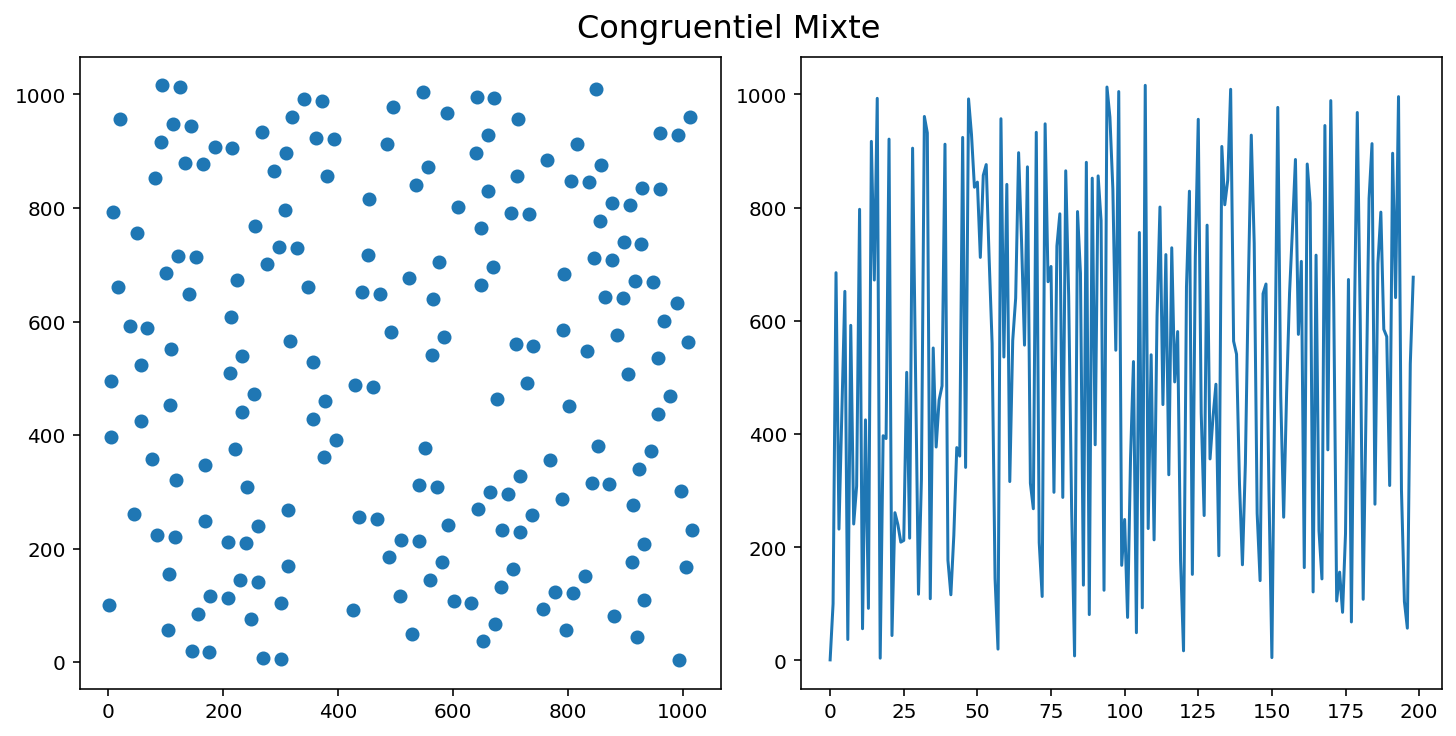

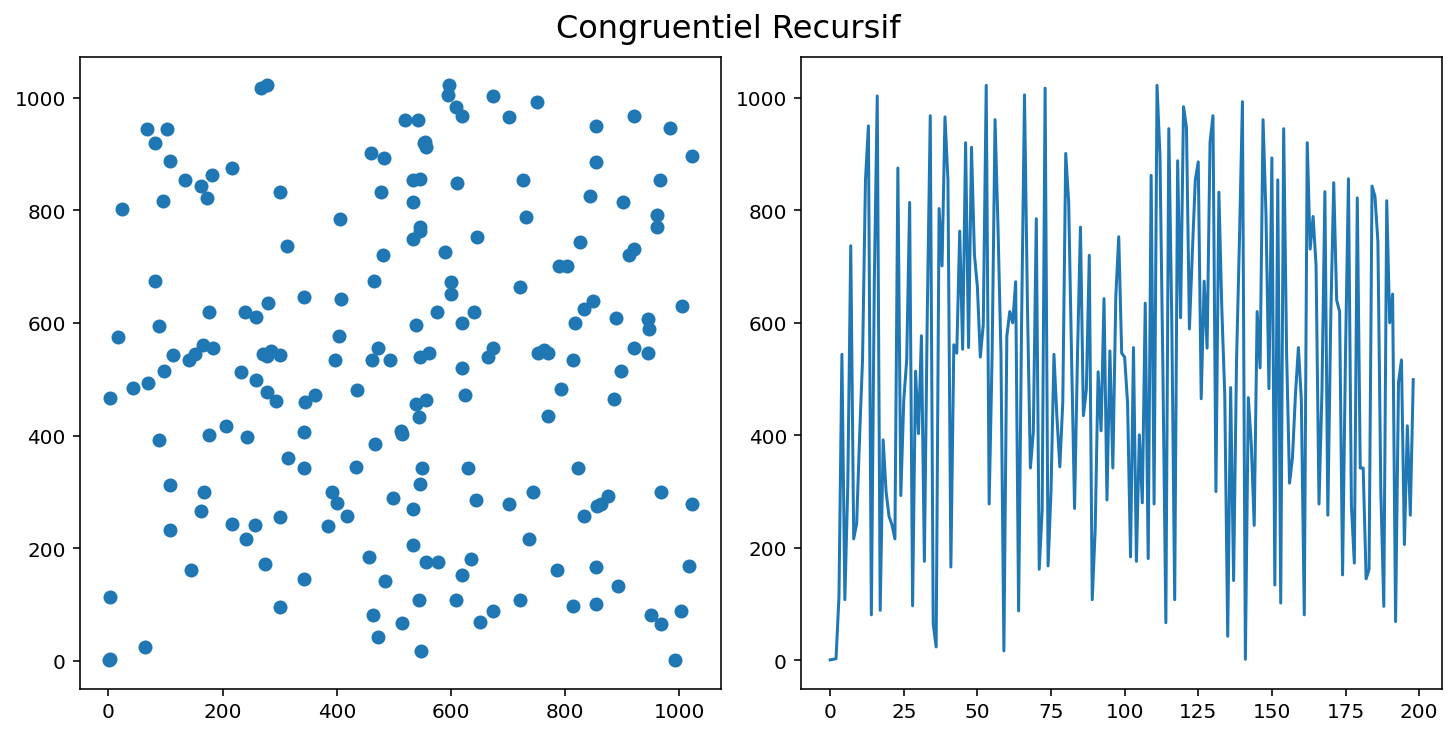

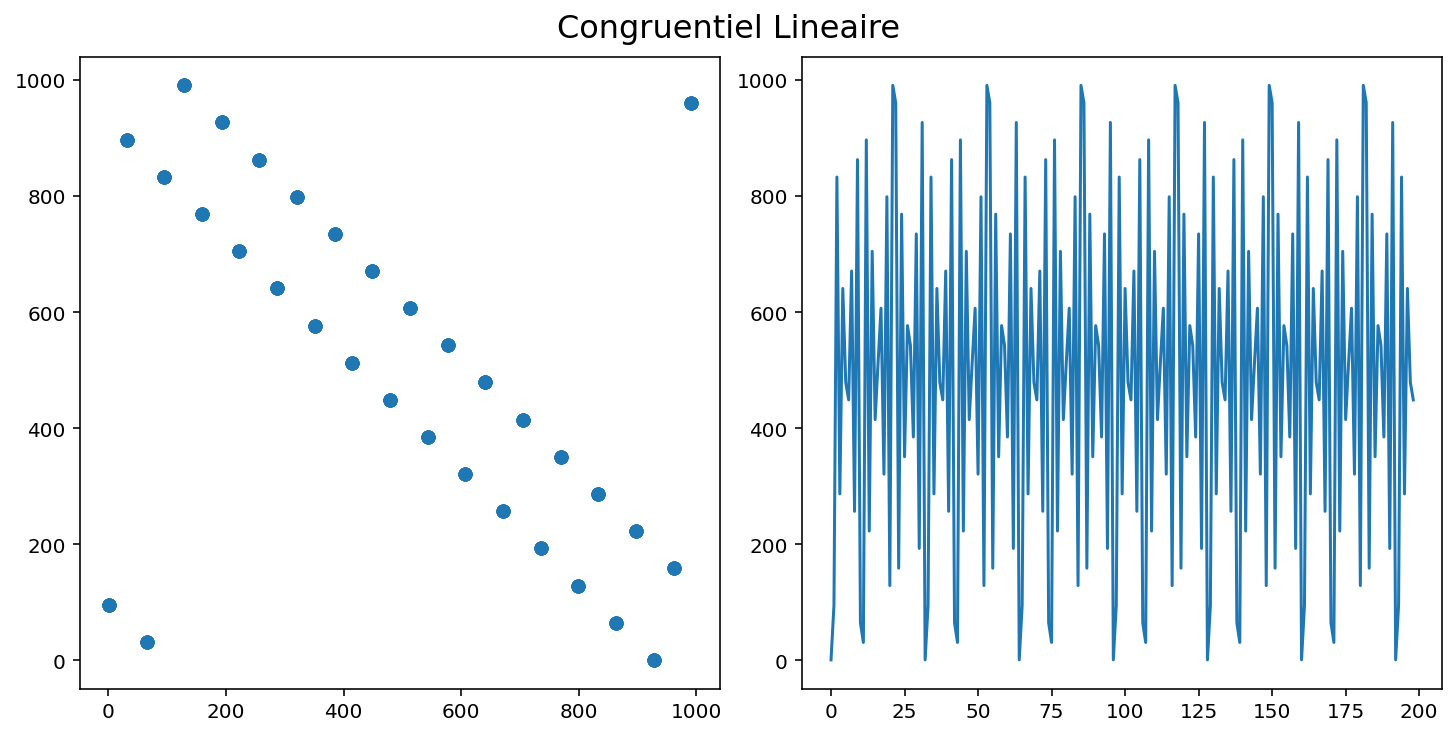

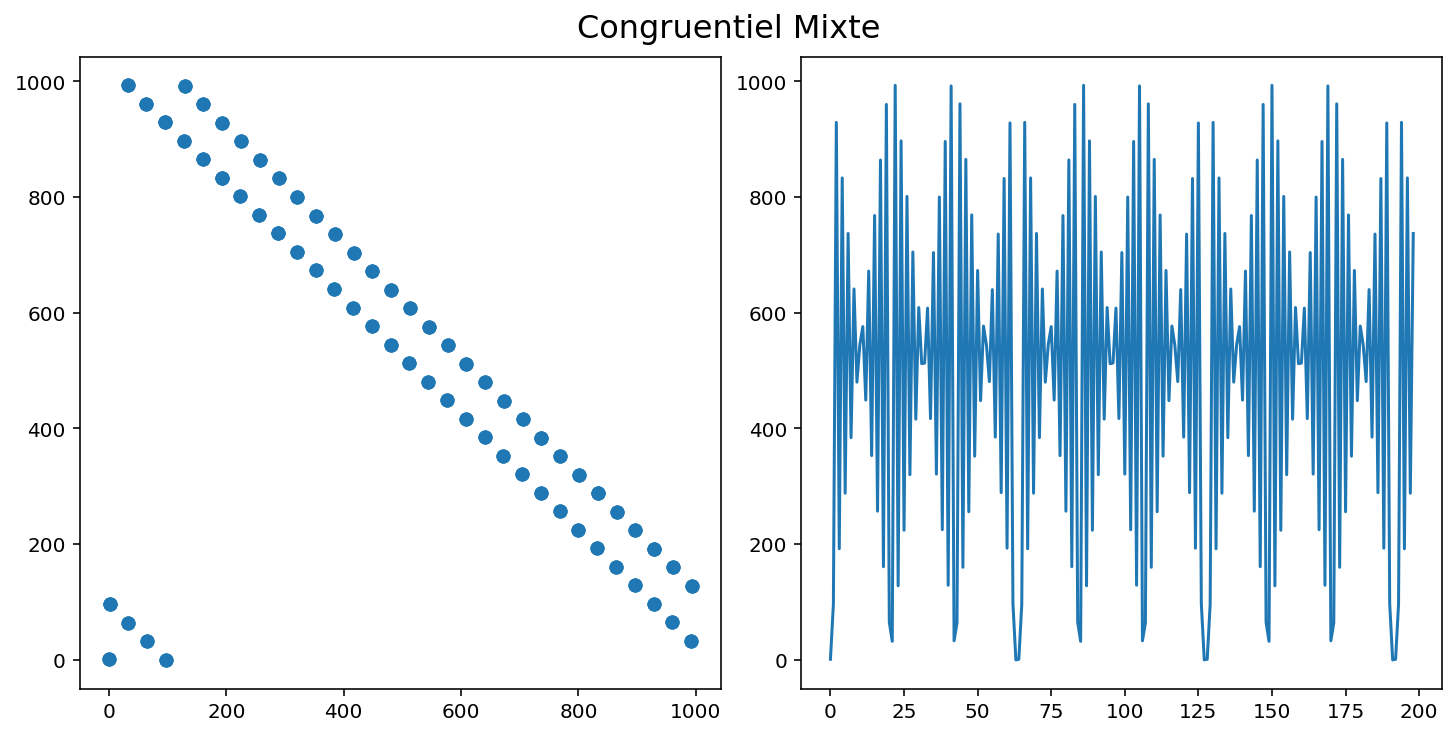

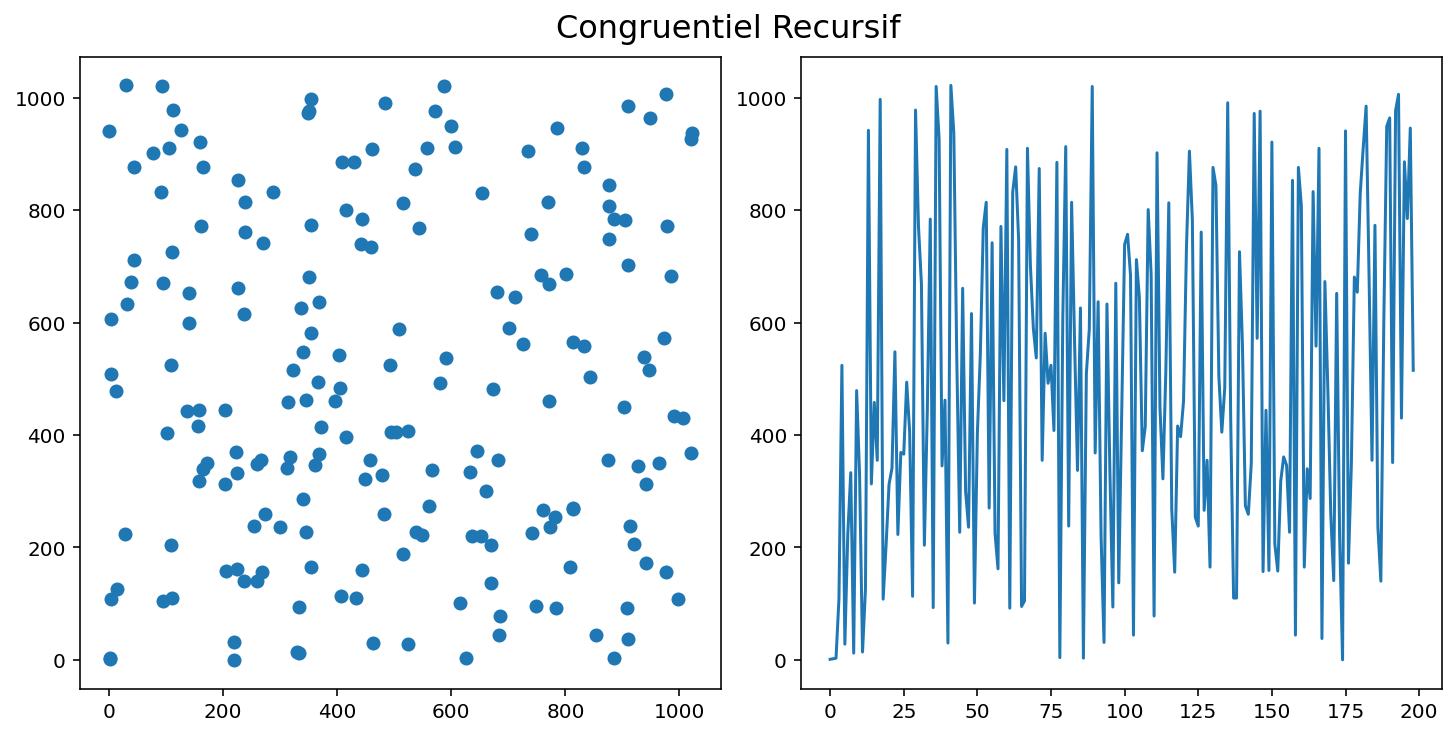

In [1]:
# Code601.py
from functools import partial

# number of generated values
N=200

# plot the random number points in a grid
def plotRNG(x,y, title):
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10,5))
    axs[0].scatter(x, y)
    axs[1].plot(range(N-1),x)
    fig.suptitle(title, fontsize=16)    
    
# Congruential Generator
# conGen is a Python generator that yields a random number each time next() is called
def congGen(rng_function, seed, m, **params):
    x_n = seed
    while True:
        yield x_n[0]
        s = rng_function(x_n, **params) % m
        x_n = x_n[1:]; x_n.append(s)

# a_1 x_n-1 + a_2 x_n-2 + .... + a_k x_n-k + c
def sumRNG(x, **p):
    s = 0 
    for i in range(p['k']): s += p['a' + str(i)] * x[i]
    return s + p['c']  

# partial congruential generator    
pcg = partial(congGen, lambda x, **p : sumRNG(x,**p)) 

# test RNG
def test(smas):
    for sma in smas:
        seed,m , abc = sma[0], sma[1], sma[2]
        cgi = pcg(seed, m, **abc); rs = [ next(cgi) for _ in range(N)] 
        plotRNG(rs[:-1],rs[1:], sma[3])

# Random number generators
test([ 
      [[1], 2**10, {'k':1,'a0':99, 'c':0}, 'Congruentiel Lineaire'],
      [[1], 2**10, {'k':1,'a0':99, 'c':1}, 'Congruentiel Mixte'],
      [[1,2,3], 2**10, {'k':3,'a0':99, 'a1':2, 'a2':3,  'c':1}, 'Congruentiel Recursif'],

      [[1], 2**10, {'k':1,'a0':95, 'c':0}, 'Congruentiel Lineaire'],
      [[1], 2**10, {'k':1,'a0':95, 'c':1}, 'Congruentiel Mixte'],
      [[1,2,3], 2**10, {'k':3,'a0':95, 'a1':2, 'a2':3,  'c':1}, 'Congruentiel Recursif']
      ])

## KS Test

In [2]:
#Code602.py

from scipy import stats
from scipy.stats import ksone

# stats.kstest: returns the calculeted KS statistic
# ksone.ppf: returns the KS table value correspondent to alpha and n
def testKS(data,alpha,F,p):
    n = len(data)
    DKS = stats.kstest(data, lambda x: F(x,**p))[0];  print('DKS    :', DKS)
    DA = ksone.ppf(1-alpha/2, n);                     print('Dalpha :', DA)
    return(DKS<DA)

# Test, loc is the sequence average and scale is its standard deviation
x = [4,5,5,1,1,3,2,2,4,10,7,5,5,4,8,9,7,6]
alpha = 0.05
print('H0     : ',testKS(x, alpha, stats.norm.cdf, {'loc':4.88,'scale':2.60}))

#______________________________   Output  ______________________________________
# DKS    : 0.14826048100509914
# Dalpha : 0.30936031179258944
# H0     : True

DKS    : 0.14826048100509914
Dalpha : 0.30936031179258944
H0     :  True


## Chi2 Test

In [3]:
#Code 603.py

from scipy.stats import chisquare
from scipy.stats import chi2

# chisquare: returns the calculeted Chi2 statistic
# chi2.ppf: returns the chi2 table value correspondent to alpha and df
def testChi2(data_obs, data_expected=None, alpha=0.05):
    df = len(data_obs) - 1
    Dc2 = chisquare(data_obs, data_expected) if data_expected else chisquare(data_obs)
    print('DChi2  :', Dc2[0])
    DA = chi2.ppf(1-alpha, df);                     print('Dalpha :', DA)
    return(Dc2[0]<DA)

# Test, loc is the sequence average and scale is its standard deviation
x = [8,12,13,14,9,6,8,7,14,9]
alpha = 0.05
print('H0     : ',testChi2(x))

#______________________________   Output  ______________________________________
# DChi2  : 8.0
# Dalpha : 16.918977604620448
# H0     :  True

DChi2  : 8.0
Dalpha : 16.918977604620448
H0     :  True


## Pearson correlation Test

In [4]:
# Code604.py

# Pearson correlation coefficient
def autocorrelation(data):
    n=len(data)
    nextData   = [data[i]*data[(i+1)%n] for i in range(n)]
    squareData = [data[i]**2 for i in range(n)]
    autocorrel = (n*sum(nextData) - sum(data)**2 ) / ( n*sum(squareData) - sum(data)**2)
    return autocorrel

data1 = [96, 929, 192, 833, 288, 737, 384, 641, 480, 545, 576, 449, 672, 353, 
       768, 257, 864, 161, 960,65, 32, 993, 128, 897, 224, 801, 320, 705, 416, 
       609, 512, 513, 608, 417, 704, 321, 800, 225,896, 129, 992, 33, 64, 961, 
       160, 865, 256, 769, 352, 673, 448, 577, 544, 481, 640, 385, 736,289, 832, 
       193, 928, 97, 0, 1, 96, 929, 192, 833, 288, 737, 384, 641, 480, 545, 576, 
       449, 672,353, 768, 257, 864, 161, 960, 65, 32, 993, 128, 897, 224, 801, 
       320, 705, 416, 609, 512, 513,608, 417, 704, 321, 800]
print('Data1 : ', autocorrelation(data1))

data2 = [100, 685, 232, 441, 652, 37, 592, 241, 308, 797, 56, 425, 92, 917, 672, 
        993, 4, 397, 392, 921,44, 261, 240, 209, 212, 509, 216, 905, 508, 117, 
        320, 961, 932, 109, 552, 377, 460, 485, 912,177, 116, 221, 376, 361, 
        924, 341, 992, 929, 836, 845, 712, 857, 876, 709, 560, 145, 20, 957,
        536, 841, 316, 565, 640, 897, 740, 557, 872, 313, 268, 933, 208, 113, 
        948, 669, 696, 297, 732,789, 288, 865, 644, 269, 8, 793, 684, 133, 880, 
        81, 852, 381, 856, 777, 124, 1013, 960, 833,548, 1005, 168, 249, 76]
print('Data2 : ', autocorrelation(data2))

#______________________________   Output  ______________________________________
# Data1 : -0.6533458794659233
# Data2 : -0.023560372803231835

Data1 :  -0.6533458794659233
Data2 :  -0.023560372803231835


## Inverse Transformation

In [0]:
#Code 605.py

import random
from itertools import accumulate
from operator import itemgetter
#
def transformation_inverse(prob,indices):
    u = random.random()
    for i in range(len(prob)):
        if(u<prob[i]): return indices[i]
    return indices[-1]

# returns the frequencies in N generated rv
def generate(prob, N=100000):
    indices, prob = zip(*sorted(enumerate(prob), key=itemgetter(1),reverse=True))
    prob = list(accumulate(prob))
    freq = {k:0  for k in range(len(prob))}
    for _ in range(N):
        gen = transformation_inverse(prob,indices)
        freq[gen] += 1
    return {k:v/N for k,v in freq.items()}

# test
prob = [0.2,0.15,0.25,0.4]
print(generate(prob))

#______________________________   Output  ______________________________________
#{1: 0.19671, 2: 0.1498, 3: 0.25018, 4: 0.40331}

## Acceptance-Rejection Method

In [6]:
#Code606.py

import random

# acceptance-rejection method
def acceptationRejet(pj, qj, genY, **p):
    c = max([pj[k]/qj[k] for k in pj.keys()])
    while (True):
        y = genY(qj, **p)
        u = random.random()
        if(u < pj[y]/(qj[y]*c)): return y
    return -1
#
def generate(pj,qj,N=100000):
    freq = {k:0  for k in pj.keys()}
    for _ in range(N):
        gen = acceptationRejet(pj, qj, lambda qi : int(random.random()*10)+1 , **{})
        freq[gen] += 1
    return {k:v/N for k,v in freq.items()}

# test
pj = {1:0.11,2:0.12,3:0.09,4:0.08,5:0.12,6:0.10,7:0.09,8:0.09,9:0.05,10:0.15}
qj = {1:0.1 ,2:0.1,3:0.1,4:0.1,5:0.1,6:0.1,7:0.1,8:0.1,9:0.1,10:0.1}
print(generate(pj,qj))

#______________________________   Output  ______________________________________
#{1: 0.10696, 2: 0.1202,  3: 0.09187, 4: 0.07928, 5: 0.11926, 6: 0.09927, 
# 7: 0.09127, 8: 0.09055, 9: 0.0494, 10: 0.15194}

{1: 0.10799, 2: 0.12155, 3: 0.08948, 4: 0.08115, 5: 0.1195, 6: 0.09977, 7: 0.09001, 8: 0.09077, 9: 0.04986, 10: 0.14992}
